Задание простого уровня Загрузите данные из файла non_linear.csv и сгенерируйте данные до степени degree = 8 включительно. Обучите модель sklearn.linear_model.Lasso и модель sklearn.linear_model.Ridge на полученных данных, используйте коэффициент регуляризации  𝛼=0.8  для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.
Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:

### Домашняя работа

**Задание простого уровня** Загрузите данные из файла `non_linear.csv` и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](https://pp.userapi.com/c850136/v850136613/19282c/OfwruuxOkPw.jpg)

# Новый раздел

# Новый раздел

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


In [3]:
df = pd.read_csv('non_linear.csv')
df.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [101]:
def create_degree(data_f: list, degree: int):
  return np.array([data_f**n for n in range(1, degree+1)]).T

X = create_degree(df['x_train'], 8)
y = df['y_train']

In [102]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
ridge_model = Ridge(alpha=0.8).fit(X_train, y_train)
lasso_model = Lasso(alpha=0.8).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.687e+00, tolerance: 2.720e-03
  model = cd_fast.enet_coordinate_descent(


In [110]:
ridge_coef = ridge_model.coef_
lasso_coef = lasso_model.coef_
lasso_coef

array([-0.00000000e+00, -0.00000000e+00, -7.83178231e-03, -9.96230841e-03,
        9.36852558e-04,  1.88069395e-04,  4.45474809e-06, -2.02893395e-06])

In [104]:
lasso_x = [x for x in range(1,9)]
ridge_x = [x+0.5 for x in range(8)]

In [105]:
lasso_x
ridge_x

[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]

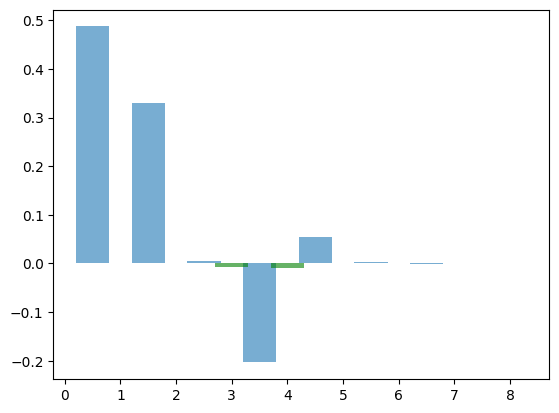

In [109]:
plt.bar(ridge_x, height=ridge_coef, width=0.6, alpha=0.6)
plt.bar(lasso_x, height=lasso_coef, width=0.6, alpha=0.6, color='green')
plt.show()

Пока что мы пользуемся моделями с регуляризацией как "черным ящиком" - знаем, как применять и это работает! Для успешного решения задач этого достаточно. Если вам, как и мне, интересно *почему* это работает - добро пожаловать во второй урок, где Вас ждёт больше кода и формул!

у ridge коэфициенты имеют гораздо большее значение, у лассо все коэфициенты лежат близко к 0